In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Data Collection and Preprocessing 


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
#This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
#The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
#The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

1) Cleaning missing , zero values and outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# So there are no null values .

In [ ]:
# We will now look for zero values in columns (Glucose ,BloodPressure , SkinThickness , Age ) and drop all the rows containing zero values
#df1=df[df[["Pregnancies",	"Glucose",	"BloodPressure",	"SkinThickness",	"Insulin"	,"BMI"	,"DiabetesPedigreeFunction",	"Age"	]]==0]

In [ ]:
df[df.Glucose==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [ ]:
df=df[df.Glucose!=0]

In [ ]:
df.shape

(763, 9)

In [ ]:
df[df.BloodPressure==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [ ]:
df=df[df.BloodPressure!=0]

In [ ]:
df[df.SkinThickness==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [ ]:
df=df[df.SkinThickness!=0]

In [ ]:
df[df.Age==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
# So, we have removed the zeros values . Now let us look for outliers

In [ ]:
df.columns[:-1]
list(df.columns[:-1])

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


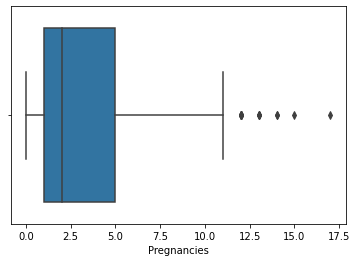

In [ ]:
sns.boxplot(df.Pregnancies)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


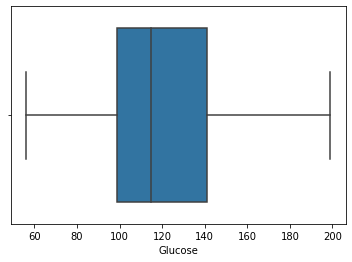

In [ ]:
sns.boxplot(df.Glucose)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


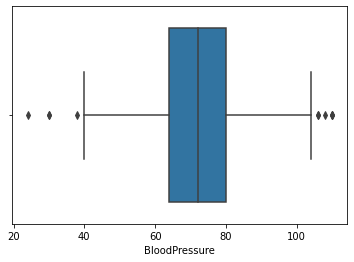

In [ ]:
sns.boxplot(df.BloodPressure)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


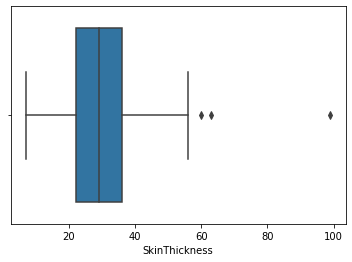

In [ ]:
sns.boxplot(df.SkinThickness)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


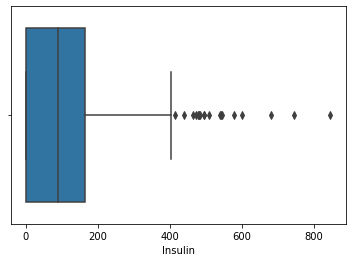

In [ ]:
sns.boxplot(df.Insulin)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


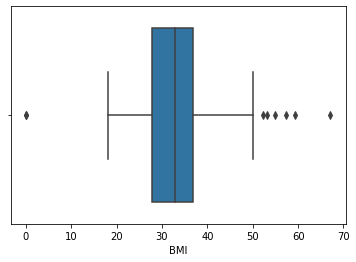

In [ ]:
sns.boxplot(df.BMI)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


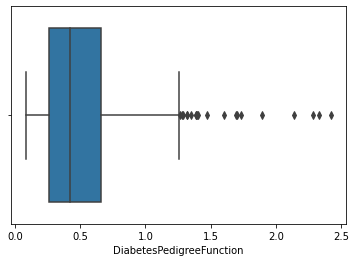

In [ ]:
sns.boxplot(df.DiabetesPedigreeFunction)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


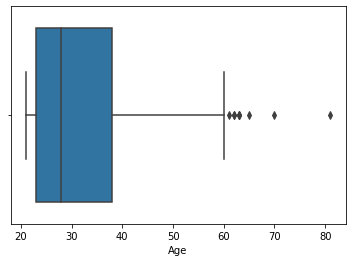

In [ ]:
sns.boxplot(df.Age)

In [ ]:
df.shape

(534, 9)

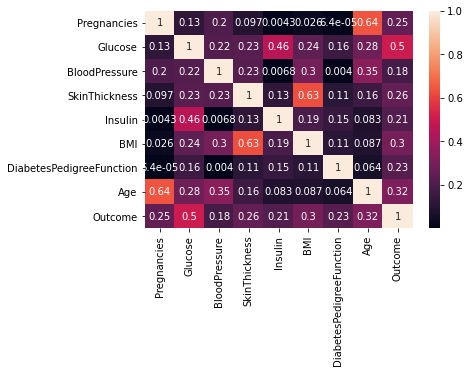

In [ ]:
sns.heatmap(np.abs(df.corr()), annot=True)

In [ ]:
# Outlier Treatment
for i in list(df.columns):
   Q1=df[i].quantile(0.25)
   Q3=df[i].quantile(0.75)
   iqr=Q3-Q1
   UB=Q3+1.5*iqr
   LB=Q1-1.5*iqr
   df.drop(df[df[i]>UB].index,axis=0,inplace=True)
   df.drop(df[df[i]<LB].index,axis=0,inplace=True)

MODEL CREATION AND TESTING


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split (df[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction','Age']]  ,  df["Outcome"] , test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(xtrain,ytrain)
y_train_predicted= model1.predict(xtrain)
y_test_predicted= model1.predict(xtest)
accuracy = metrics.accuracy_score(ytrain, y_train_predicted)
accuracy_percentage = 100 * accuracy
print("train_accuracy = " , accuracy_percentage, "%")
accuracy = metrics.accuracy_score(ytest, y_test_predicted)
accuracy_percentage = 100 * accuracy
print("test_accuracy = " , accuracy_percentage, "%")

train_accuracy =  81.21019108280255 %
test_accuracy =  77.77777777777779 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)
y_train_predicted= model2.predict(xtrain)
y_test_predicted= model2.predict(xtest)
accuracy = metrics.accuracy_score(ytrain, y_train_predicted)
accuracy_percentage = 100 * accuracy
print("train_accuracy = " , accuracy_percentage, "%")
accuracy = metrics.accuracy_score(ytest, y_test_predicted)
accuracy_percentage = 100 * accuracy
print("test_accuracy = " , accuracy_percentage, "%")

train_accuracy =  100.0 %
test_accuracy =  71.85185185185186 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier()
model3.fit(xtrain,ytrain)
y_train_predicted= model3.predict(xtrain)
y_test_predicted= model3.predict(xtest)
accuracy = metrics.accuracy_score(ytrain, y_train_predicted)
accuracy_percentage = 100 * accuracy
print("train_accuracy = " , accuracy_percentage, "%")
accuracy = metrics.accuracy_score(ytest, y_test_predicted)
accuracy_percentage = 100 * accuracy
print("test_accuracy = " , accuracy_percentage, "%")

train_accuracy =  100.0 %
test_accuracy =  79.25925925925927 %


In [ ]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(xtrain,ytrain)
y_train_predicted= model4.predict(xtrain)
y_test_predicted= model4.predict(xtest)
accuracy = metrics.accuracy_score(ytrain, y_train_predicted)
accuracy_percentage = 100 * accuracy
print("train_accuracy = " , accuracy_percentage, "%")
accuracy = metrics.accuracy_score(ytest, y_test_predicted)
accuracy_percentage = 100 * accuracy
print("test_accuracy = " , accuracy_percentage, "%")

train_accuracy =  81.21019108280255 %
test_accuracy =  77.77777777777779 %


In [ ]:
import pickle

In [ ]:
with open("model_pickle","wb") as f:
  pickle.dump(model3,f)